In [41]:
# story z score shows story similarity, window z score schows window similarity, MIGHT need more data for fig 1f -- different windows' comparison

import numpy as np
import pandas as pd

scores = np.load('scores/S1/perceived_speech/wheretheressmoke.npz', allow_pickle=True)
print(scores.files)
score_names = ['window_scores', 'window_zscores', 'story_scores', 'story_zscores']
score_files = {}
for name in score_names:
    score_files[name] = scores[name].item()

print(score_files['story_scores'])

['window_scores', 'window_zscores', 'story_scores', 'story_zscores']
{('wheretheressmoke', 'WER'): np.float64(0.056630456970384296), ('wheretheressmoke', 'BLEU'): np.float64(0.2274254386329718), ('wheretheressmoke', 'METEOR'): np.float64(0.164688325631107), ('wheretheressmoke', 'BERT'): np.float32(0.80714226)}


In [45]:
zscores = {'subject': [], 'WER':[],'BLEU':[], 'METEOR':[], 'BERT':[]}
s_scores = {'subject': [], 'WER':[],'BLEU':[], 'METEOR':[], 'BERT':[]}

for i in range(1,4):
    scores = np.load(f'scores/S{i}/perceived_speech/wheretheressmoke.npz', allow_pickle=True)
    score_names = ['window_scores', 'window_zscores', 'story_scores', 'story_zscores']
    score_files = {}
    for name in score_names:
        score_files[name] = scores[name].item()
    print(score_files['story_scores'])
    print(score_files['story_zscores'])
    zscores['subject'].append(i)
    s_scores['subject'].append(i)
    for k,v in score_files['story_zscores'].items():
        zscores[k[1]].append(v)
    for k,v in score_files['story_scores'].items():
        s_scores[k[1]].append(v)
    

{('wheretheressmoke', 'WER'): np.float64(0.056630456970384296), ('wheretheressmoke', 'BLEU'): np.float64(0.2274254386329718), ('wheretheressmoke', 'METEOR'): np.float64(0.164688325631107), ('wheretheressmoke', 'BERT'): np.float32(0.80714226)}
{('wheretheressmoke', 'WER'): np.float64(7.155794176075754), ('wheretheressmoke', 'BLEU'): np.float64(5.9819780851328215), ('wheretheressmoke', 'METEOR'): np.float64(6.147434015058574), ('wheretheressmoke', 'BERT'): np.float32(14.002044)}
{('wheretheressmoke', 'WER'): np.float64(0.059563103531219845), ('wheretheressmoke', 'BLEU'): np.float64(0.2374957607363284), ('wheretheressmoke', 'METEOR'): np.float64(0.16943283002335233), ('wheretheressmoke', 'BERT'): np.float32(0.8095943)}
{('wheretheressmoke', 'WER'): np.float64(6.645121252706422), ('wheretheressmoke', 'BLEU'): np.float64(6.835074519541741), ('wheretheressmoke', 'METEOR'): np.float64(6.425781471332081), ('wheretheressmoke', 'BERT'): np.float32(17.386839)}
{('wheretheressmoke', 'WER'): np.flo

In [122]:
results_df = pd.DataFrame(zscores)

# WER correction
# results_df['WER'] = 1-results_df['WER']

results_df

,subject,WER,BLEU,METEOR,BERT
0,1,7.155794,5.981978,6.147434,14.002044
1,2,6.645121,6.835075,6.425781,17.386839
2,3,11.143399,7.674204,9.176220,18.887459


In [123]:
results_df.to_csv('perceived_speech_zscores.csv',index = False)

results_df

,subject,WER,BLEU,METEOR,BERT
0,1,7.155794,5.981978,6.147434,14.002044
1,2,6.645121,6.835075,6.425781,17.386839
2,3,11.143399,7.674204,9.176220,18.887459


In [ ]:
#get null scores
n_win_scores_log = '''WER
[0.04207089 0.03975845 0.04010421 0.03554661 0.0406593  0.03491259
 0.03873168 0.03784912 0.03832665 0.03760811 0.03106324 0.04144817
 0.04078438 0.03279782 0.03584328 0.0353223  0.03758642 0.03571726
 0.03810674 0.04016526 0.03623029 0.03280262 0.03722642 0.03604771
 0.04237269 0.03834353 0.03466181 0.03915694 0.04395726 0.03909755
 0.04007107 0.04233708 0.0353146  0.03539313 0.03812897 0.03641498
 0.04108804 0.03770175 0.0388497  0.03896745 0.03910616 0.03759435
 0.03603846 0.04576593 0.03626688 0.04529647 0.03464036 0.0366249
 0.04153817 0.03665373 0.03728854 0.04297677 0.038457   0.03139175
 0.03940035 0.04100399 0.04067381 0.04109974 0.03509928 0.03878284
 0.03590718 0.03902198 0.03844558 0.03863596 0.03541504 0.03832522
 0.03605044 0.03380483 0.04439898 0.04107896 0.04063482 0.03394181
 0.03998031 0.03914803 0.0350556  0.04029947 0.03994065 0.04234517
 0.03732423 0.03524135 0.03787867 0.03928348 0.03876756 0.04142036
 0.0399773  0.04148235 0.03869311 0.03791951 0.03491991 0.03632593
 0.03558724 0.04181796 0.03598531 0.0325142  0.04304211 0.04878864
 0.04133851 0.03771452 0.03892913 0.03860557 0.03677646 0.03910263
 0.0348801  0.03450264 0.03653265 0.04671165 0.03416974 0.04258228
 0.0366188  0.03443623 0.03661498 0.03986515 0.03556767 0.03622412
 0.03965474 0.03652696 0.03631032 0.03241363 0.03955976 0.04125953
 0.03942445 0.04312664 0.04297009 0.03505505 0.04006731 0.03745686
 0.03759575 0.03759688 0.03510957 0.03306814 0.04985405 0.0440887
 0.03200105 0.04277804 0.03499831 0.03963315 0.04280134 0.03725939
 0.03520975 0.03805337 0.04079526 0.04003272 0.04095717 0.03271436
 0.03842025 0.03566816 0.03300833 0.04112739 0.03746461 0.03586659
 0.03485116 0.03223369 0.03195599 0.04102661 0.03625409 0.04055173
 0.04217463 0.03962388 0.0341637  0.04012756 0.04390052 0.04218819
 0.04034403 0.03946761 0.03811558 0.04013431 0.04244033 0.03618469
 0.03908738 0.03992683 0.0444328  0.04062036 0.03615873 0.03941185
 0.03944001 0.04001547 0.04098216 0.03504726 0.04495519 0.04001059
 0.03430811 0.04310232 0.03309673 0.04157505 0.03510315 0.03877477
 0.04684833 0.0462965  0.03617964 0.03564114 0.04349054 0.04202658
 0.03334719 0.04182267 0.03610119 0.04155472 0.04085513 0.03723302
 0.04049972 0.04121811]
wheretheressmoke
BLEU
[0.19710373 0.19773971 0.19101483 0.19815049 0.19138907 0.18037187
 0.20099261 0.21199418 0.18793408 0.18699334 0.18753008 0.1919208
 0.19524932 0.18261707 0.17675832 0.20370522 0.18975939 0.18729328
 0.19458669 0.18925927 0.19989896 0.18611199 0.18398542 0.18357707
 0.19888252 0.17363435 0.18145038 0.19526629 0.20876904 0.19093033
 0.19853174 0.2018356  0.18491192 0.19089354 0.18665765 0.1812417
 0.19885891 0.19497623 0.19664933 0.1895433  0.19834181 0.19616848
 0.19160177 0.20247101 0.19029434 0.20199858 0.18150336 0.19479892
 0.19356281 0.1814542  0.1959388  0.20003057 0.20003652 0.18256725
 0.18982598 0.19703983 0.19059172 0.19838142 0.18697785 0.18458353
 0.1920287  0.18513306 0.19085931 0.19516276 0.18778038 0.19538489
 0.18131636 0.18386167 0.19968853 0.18934075 0.19334825 0.18648831
 0.19902941 0.18845559 0.19486205 0.20094899 0.18899811 0.19148257
 0.20227382 0.18469873 0.18278153 0.18983699 0.1967429  0.19316139
 0.20364663 0.1951419  0.18982078 0.1953984  0.18287644 0.18291221
 0.19080015 0.18862339 0.17858561 0.19360414 0.19442385 0.20552809
 0.19250723 0.18659925 0.19186759 0.20334715 0.18059693 0.18981198
 0.18806958 0.1919829  0.1864454  0.19694698 0.18371365 0.20240866
 0.19139386 0.1883632  0.18546802 0.19720367 0.18478659 0.19221599
 0.18400724 0.18943134 0.19226561 0.18972168 0.18935309 0.19239197
 0.19801118 0.1963803  0.18462547 0.18398367 0.19804054 0.20121384
 0.1887813  0.19427454 0.19907203 0.19141853 0.21844061 0.20702261
 0.17965769 0.19841078 0.1889632  0.19166192 0.19432315 0.18664583
 0.19182981 0.18826165 0.19841835 0.1859211  0.20441532 0.18778324
 0.18841474 0.18997604 0.18995345 0.20606204 0.1841342  0.18575338
 0.18774339 0.18241178 0.18623764 0.19419151 0.1888923  0.20290744
 0.1910397  0.19659564 0.18645169 0.18747341 0.1978065  0.19405163
 0.19137723 0.20058045 0.18640055 0.18771981 0.19212869 0.19078896
 0.19892044 0.1900669  0.19696836 0.20194011 0.19427031 0.20301485
 0.20267624 0.19554215 0.19503361 0.1949777  0.19624791 0.19354283
 0.19152378 0.18970667 0.18141101 0.21010958 0.18977653 0.19516709
 0.19165502 0.20175369 0.19444111 0.18725474 0.19406505 0.20014368
 0.18654268 0.20185327 0.18507272 0.19120589 0.19857122 0.19005201
 0.17955524 0.19692197]
wheretheressmoke
METEOR
[0.13908125 0.14079568 0.13739486 0.14177846 0.13846639 0.13487207
 0.14445563 0.14996287 0.13557048 0.13625826 0.14067677 0.13783767
 0.14128328 0.1319098  0.13068464 0.1456664  0.13784917 0.13182903
 0.14081475 0.13386436 0.14070132 0.13105459 0.13569906 0.13458605
 0.14667675 0.12952372 0.13205629 0.14329777 0.14659766 0.14064547
 0.13952782 0.14414841 0.13214588 0.14062691 0.13582403 0.13623125
 0.14385658 0.13719216 0.14397366 0.14292653 0.14206377 0.14139816
 0.13465421 0.14701163 0.13950444 0.14485663 0.13939693 0.13882883
 0.13634673 0.13214593 0.14311106 0.13799809 0.13919525 0.13748659
 0.13530065 0.13824737 0.13660602 0.14543182 0.12949955 0.13759823
 0.1362921  0.1366773  0.13800085 0.13933411 0.1301584  0.13500358
 0.13364812 0.13475016 0.14333921 0.14106254 0.14059555 0.13918564
 0.14117726 0.13287093 0.14124258 0.14699029 0.13555791 0.13746515
 0.14264149 0.13831906 0.13761407 0.13764573 0.13791435 0.1400558
 0.14426657 0.1437544  0.13713783 0.14195507 0.13079921 0.13462681
 0.13990184 0.13779858 0.13252686 0.13923851 0.13982291 0.15091376
 0.14255513 0.14023629 0.13857422 0.14482484 0.13385906 0.14035027
 0.13448235 0.13721636 0.13899829 0.14018503 0.13271012 0.14833893
 0.13718056 0.14312624 0.13635439 0.14188437 0.13680929 0.13735037
 0.13378848 0.13566375 0.13447968 0.13884389 0.13811714 0.14233401
 0.1405311  0.14358244 0.13481653 0.13265037 0.13937411 0.14760164
 0.13353364 0.14036838 0.14438458 0.13511147 0.14948097 0.14466312
 0.12721419 0.14172054 0.13745561 0.14204096 0.14131578 0.13430935
 0.13650583 0.13556986 0.1409394  0.13561368 0.14051158 0.13486267
 0.1337229  0.14186197 0.13458808 0.14618584 0.13663501 0.14252944
 0.13953643 0.13157792 0.13227135 0.14098884 0.13654591 0.1432335
 0.13756475 0.14747954 0.13614612 0.13675792 0.14138261 0.13686847
 0.13576426 0.14461162 0.13340191 0.1373725  0.13924818 0.1328046
 0.14000553 0.13648101 0.13821939 0.14923414 0.137527   0.14126116
 0.13645859 0.14488228 0.14344338 0.14138504 0.14022201 0.14080143
 0.14130461 0.13607909 0.13530996 0.15158963 0.13479689 0.13938552
 0.1383337  0.14543531 0.14078748 0.13953371 0.14303237 0.14207761
 0.14053773 0.14260804 0.13531647 0.14001462 0.14766777 0.14322132
 0.12932468 0.14157126]
wheretheressmoke
BERT
[0.7907687  0.7901323  0.7900033  0.78921556 0.79040205 0.78864366
 0.7922332  0.7905336  0.7900549  0.78931457 0.78968805 0.7907688
 0.7906708  0.7901537  0.7895664  0.7898777  0.78911006 0.78880197
 0.7892161  0.78862107 0.7919904  0.7899849  0.7910636  0.79101276
 0.7902468  0.7885312  0.78893554 0.79179204 0.79145825 0.7901327
 0.7907618  0.7896979  0.78916264 0.7911466  0.79020655 0.7906373
 0.79210955 0.79034626 0.7912701  0.7910807  0.78894854 0.7908002
 0.7878109  0.7925843  0.7911324  0.79168296 0.7899408  0.79073465
 0.7903891  0.7900143  0.790765   0.7901131  0.79120153 0.7881794
 0.78870344 0.78970116 0.78832453 0.7906791  0.78847665 0.78989834
 0.7888742  0.7898447  0.7906238  0.78996253 0.78791094 0.79069257
 0.7885167  0.7882068  0.7899441  0.79131633 0.79196256 0.7903858
 0.79183334 0.7899835  0.7887081  0.79274076 0.78880405 0.7884095
 0.7913437  0.7898835  0.78995997 0.7916536  0.79023385 0.79014647
 0.7907503  0.7897898  0.7909637  0.791649   0.78915316 0.7890291
 0.7906189  0.7914071  0.79084915 0.7888727  0.79072475 0.79334724
 0.79156464 0.7898069  0.7896813  0.79128826 0.78870434 0.7907073
 0.7885346  0.7902097  0.7905366  0.79101896 0.788812   0.7928381
 0.78896534 0.7908205  0.7885857  0.79195136 0.7899913  0.78915894
 0.79080784 0.78984    0.7898403  0.7908683  0.7893367  0.79023063
 0.78919196 0.79178435 0.7889902  0.78878826 0.79236424 0.79026204
 0.7900352  0.7910904  0.7905498  0.78845906 0.79086363 0.790118
 0.78765476 0.78814757 0.7893404  0.79006124 0.78973025 0.7896297
 0.78939736 0.79103774 0.788976   0.7910625  0.79038936 0.7888296
 0.7902777  0.7907752  0.78902733 0.79060024 0.78926325 0.7910659
 0.789897   0.7902066  0.7899138  0.78763354 0.78772634 0.78943044
 0.79087627 0.7888331  0.78935087 0.7910121  0.79150134 0.7923266
 0.7892446  0.7912079  0.7902728  0.78942525 0.7890114  0.7875847
 0.78946525 0.7903436  0.79147476 0.79141545 0.79066527 0.7898873
 0.79106164 0.79049104 0.7905819  0.790896   0.7909003  0.7871015
 0.79085433 0.78818935 0.78953516 0.7916753  0.78748196 0.7885229
 0.7899582  0.79119354 0.7911286  0.7903703  0.7909172  0.79044867
 0.79030687 0.7915964  0.79058135 0.79053795 0.7902319  0.79125
 0.7889291  0.79109836]'''

import re
n_win_scores = re.findall(r'(?:\d.*\d)', n_win_scores_log)
temp = []
for line in n_win_scores:
    for number in line.split():
        temp.append(np.float64(number))
n_win_scores = np.array(temp)
print(len(n_win_scores))
n_win_scores = n_win_scores.reshape((4, 200))
print(n_win_scores.shape)
n_win_scores = n_win_scores.mean(1)
print(n_win_scores)

results_df = pd.DataFrame({'subject': ['null'], 'WER':[n_win_scores[0]],'BLEU':[n_win_scores[1]], 'METEOR':[n_win_scores[2]], 'BERT':[n_win_scores[3]]})

results_df = pd.concat([results_df, pd.DataFrame(s_scores)]).reset_index(drop=True)

# WER correction
results_df['WER'] = 1-results_df['WER']

results_df

800
(4, 200)
[0.03854833 0.19229849 0.1389733  0.79012465]


,subject,WER,BLEU,METEOR,BERT
0,null,0.961452,0.192298,0.138973,0.790125
1,1,0.943370,0.227425,0.164688,0.807142
2,2,0.940437,0.237496,0.169433,0.809594
3,3,0.923331,0.246584,0.180616,0.812010


In [119]:
results_df.to_csv('perceived_speech_scores.csv',index = False)

results_df

,subject,WER,BLEU,METEOR,BERT
0,null,0.961452,0.192298,0.138973,0.790125
1,1,0.943370,0.227425,0.164688,0.807142
2,2,0.940437,0.237496,0.169433,0.809594
3,3,0.923331,0.246584,0.180616,0.812010


In [ ]:
print(len(score_files['window_scores'][('wheretheressmoke', 'WER')]))

563


In [ ]:
results = np.load('results/S1/perceived_speech/wheretheressmoke.npz', allow_pickle=True)
result_names = results.files
result_files={}
for name in result_names:
    result_files[name] = results[name]
result_files

{'words': array(['she', 'said', 'she', ..., 'that', 'she', 'needs'],
       shape=(1589,), dtype='<U13'),
 'times': array([ 10.2,  10.6,  11. , ..., 591. , 591.4, 591.8], shape=(1589,))}

IndexError: index 1000 is out of bounds for axis 0 with size 1000

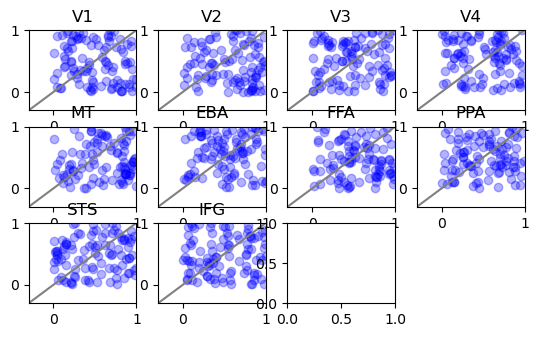

In [ ]:
from utils_ridge import util

util.plot_model_comparison_rois(np.random.rand(1000), np.random.rand(1000), "Model 1", "Model 2", [np.arange(100*i, 100*(i+1)) for i in range(16)], ["V1", "V2", "V3", "V4", "MT", "EBA", "FFA", "PPA", "STS", "IFG", "STG", "MTG", "Auditory", "Speech", "Semantic", "Motor"], thresh=0.35)
